Домашняя работа по вычислительной математике, задание 1.

Выполнил: Егоров Иван Максимович, Б01-008. Графики находятся в отдельной папке.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [37]:
h = np.array([2 / (2 ** n) for n in range(1, 22)])
func_names = np.array(["sin(x^2)", "cos(sin(x))", "exp(sin(cos(x)))", "ln(x + 3)", "sqrt(x + 3)"])

In [38]:
Functions = []
Functions.append(lambda x: np.sin (x ** 2))
Functions.append(lambda x: np.cos (np.sin (x)))
Functions.append(lambda x: np.exp (np.sin (np.cos (x))))
Functions.append(lambda x: np.log (x + 3))
Functions.append(lambda x: np.sqrt (x + 3))

In [39]:
FuncDers = []
FuncDers.append(lambda x: 2 * x * np.cos (x ** 2))
FuncDers.append(lambda x: - np.sin (np.sin (x)) * np.cos (x))
FuncDers.append(lambda x: np.exp (np.sin (np.cos (x))) * np.cos (np.cos (x)) * (- np.sin (x)))
FuncDers.append(lambda x: 1 / (x + 3))
FuncDers.append(lambda x: 1 / (2 * np.sqrt (x + 3)))

In [40]:
Methods = []
Methods.append(lambda f, h, x: (f(x + h) - f(x)) / h)
Methods.append(lambda f, h, x: (f(x) - f(x - h)) / h)
Methods.append(lambda f, h, x: (f(x + h) - f(x - h)) / (2 * h))
Methods.append(lambda f, h, x: (4 / 3) * (f(x + h) - f(x - h)) / (2 * h) - (1 / 3) * (f(x + 2 * h) - f(x - 2 * h)) / (4 * h))
Methods.append(lambda f, h, x: (3 / 2) * (f(x + h) - f(x - h)) / (2 * h) - (3 / 5) * (f(x + 2 * h) - f(x - 2 * h)) / (4 * h) + (1 / 10) * (f(x + 3 * h) - f(x - 3 * h)) / (6 * h))

In [41]:
x_0 = randint(0,100)
analytic_values = np.array([[f(x_0) for j in h] for f in FuncDers])
calculus_values = np.array([[g(f, h, x_0) for g in Methods] for f in Functions])
diff = np.array([abs(calculus_values[i] - analytic_values[i]) for i in range(5)])

<Figure size 432x288 with 0 Axes>

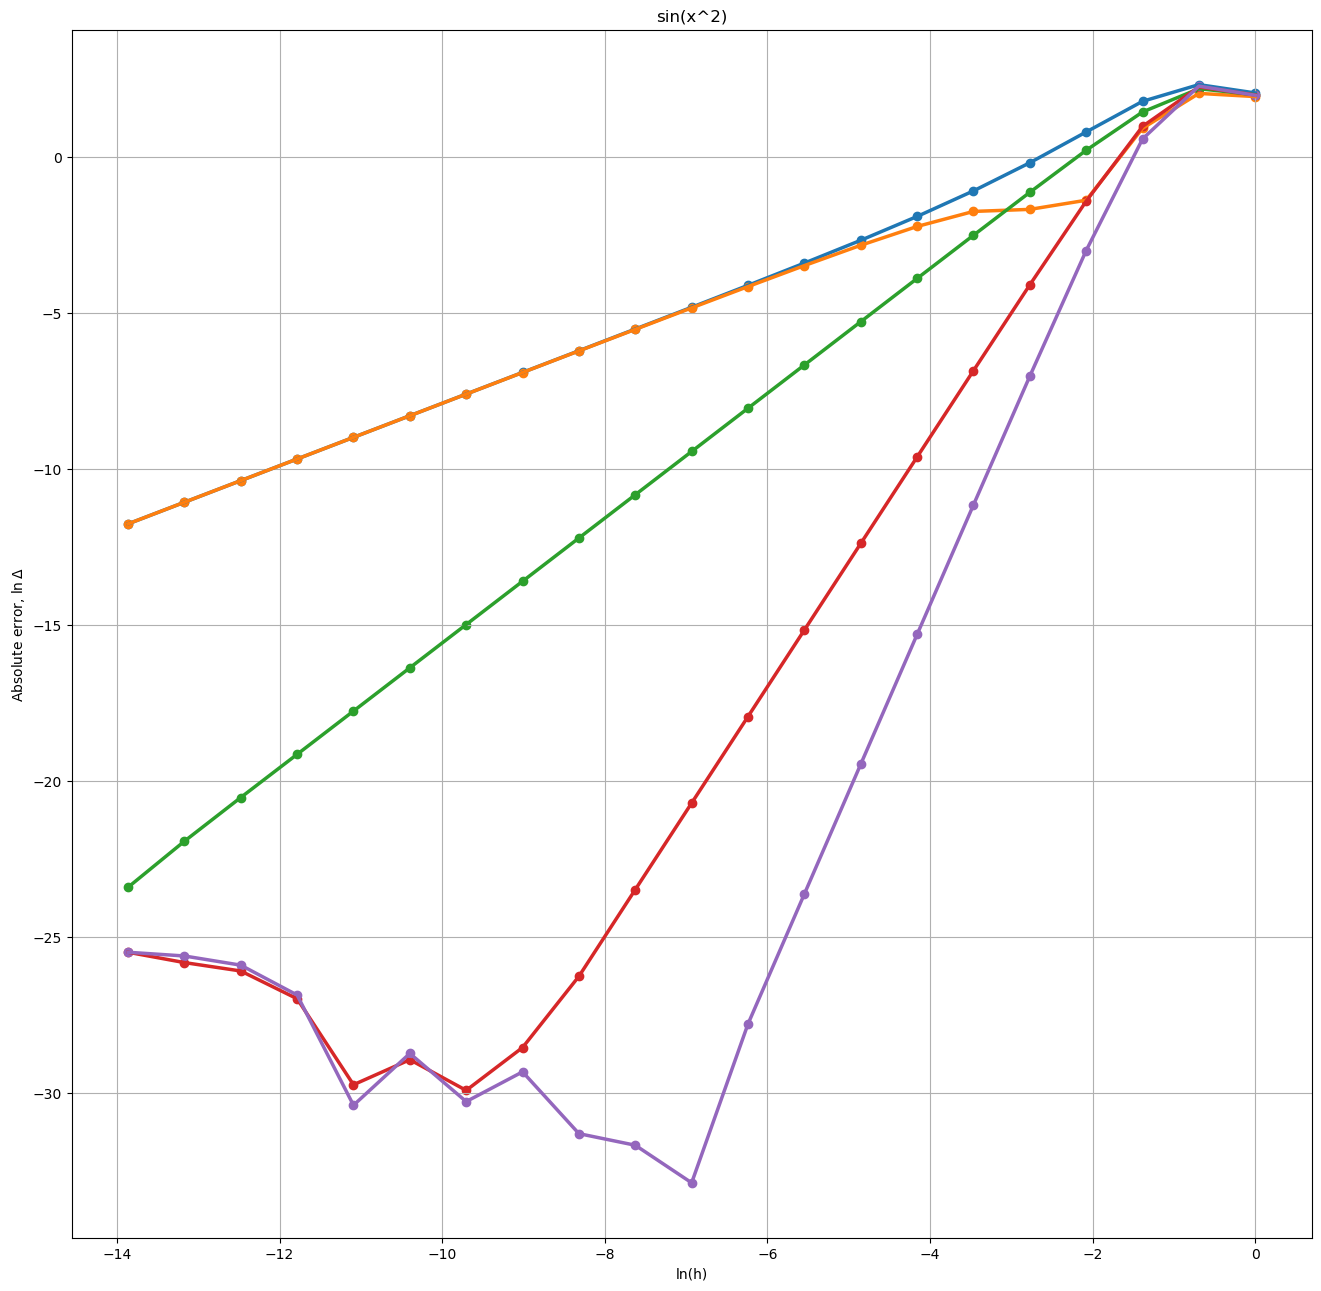

<Figure size 432x288 with 0 Axes>

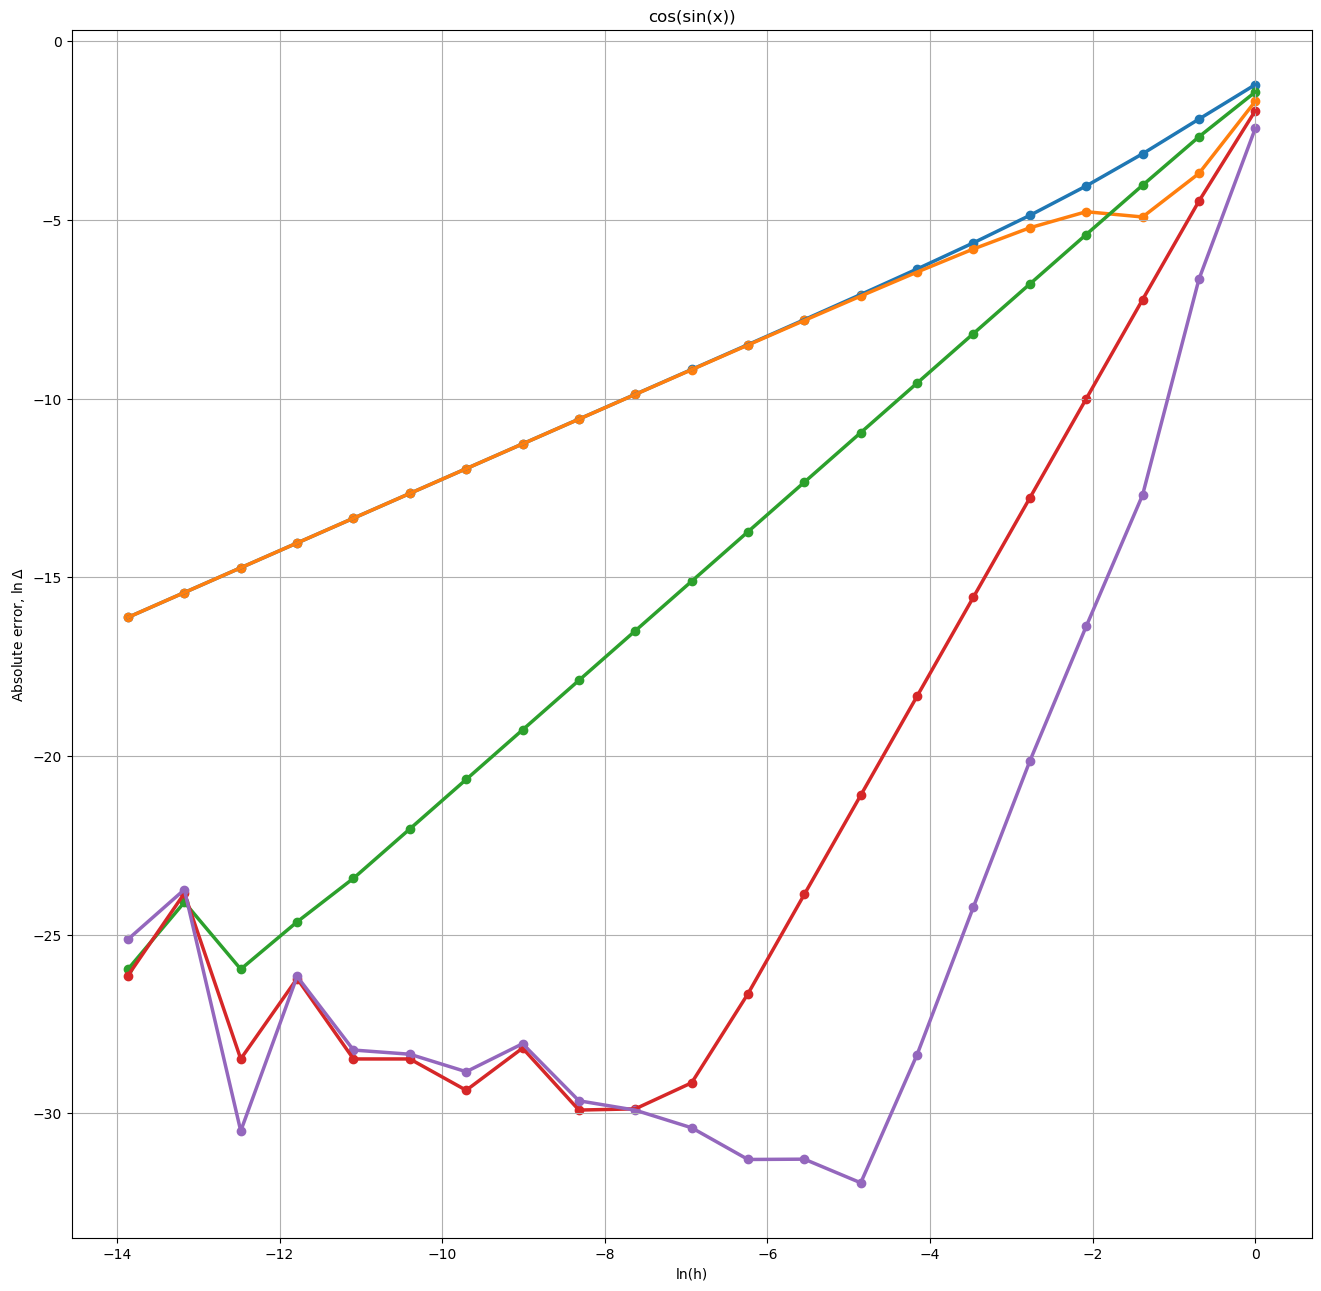

<Figure size 432x288 with 0 Axes>

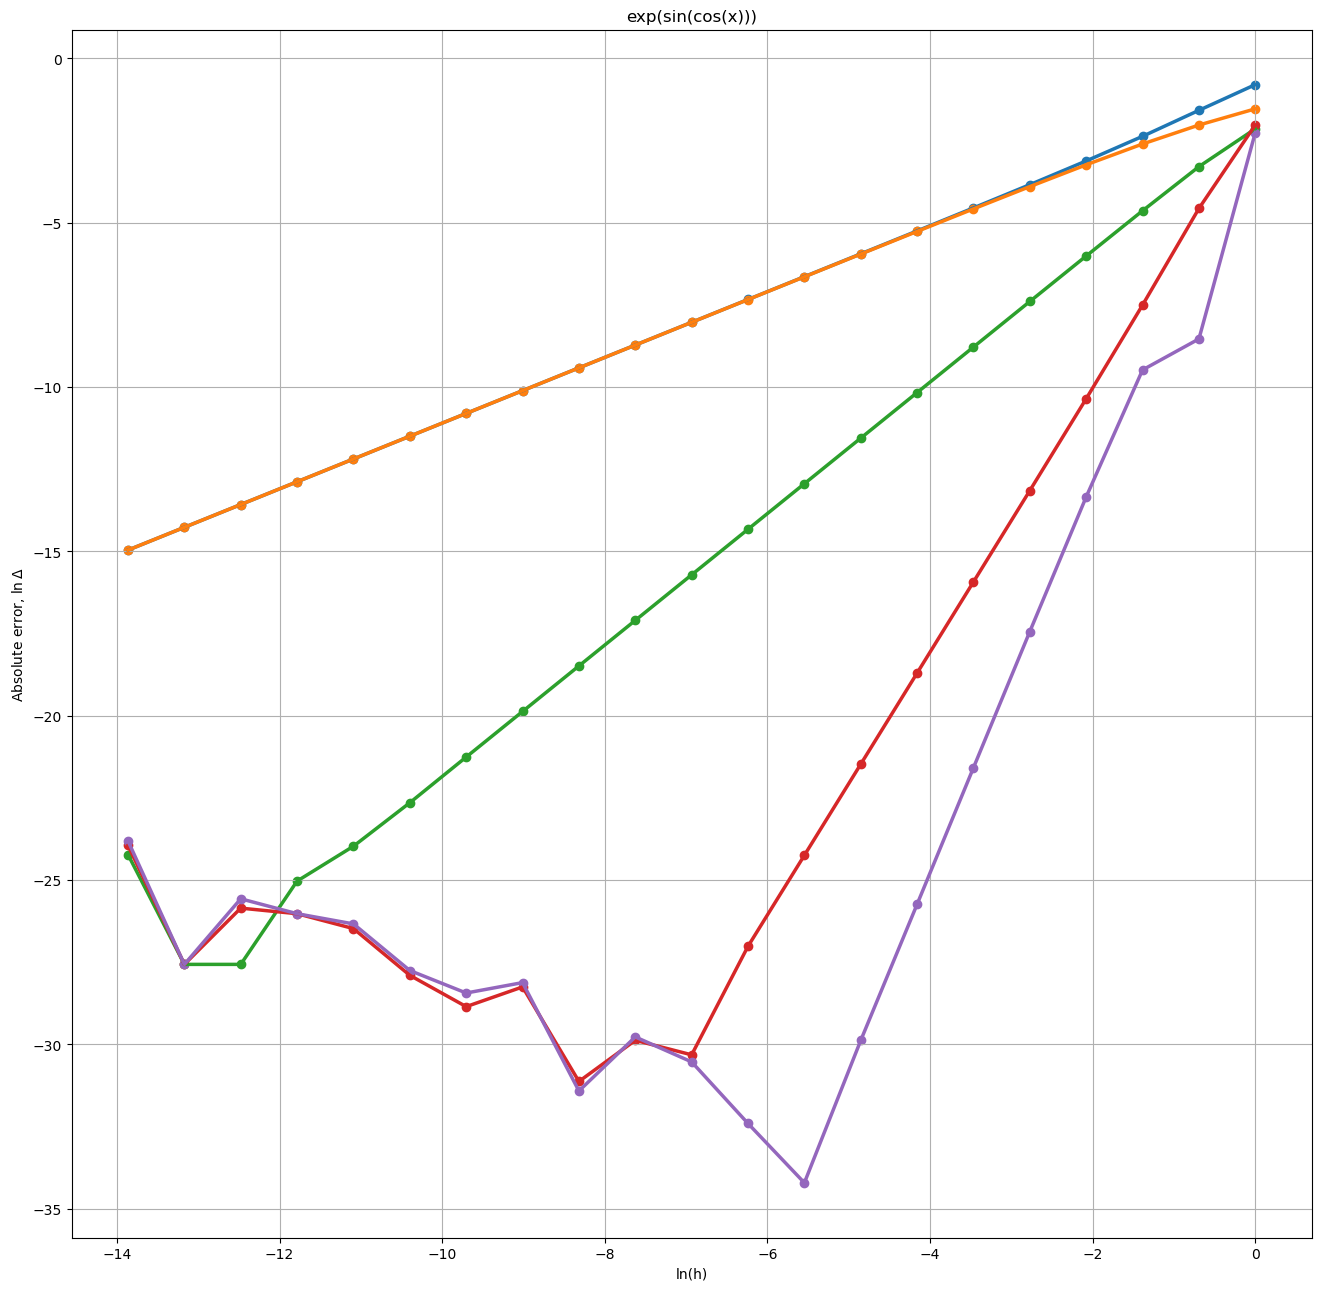

<Figure size 432x288 with 0 Axes>

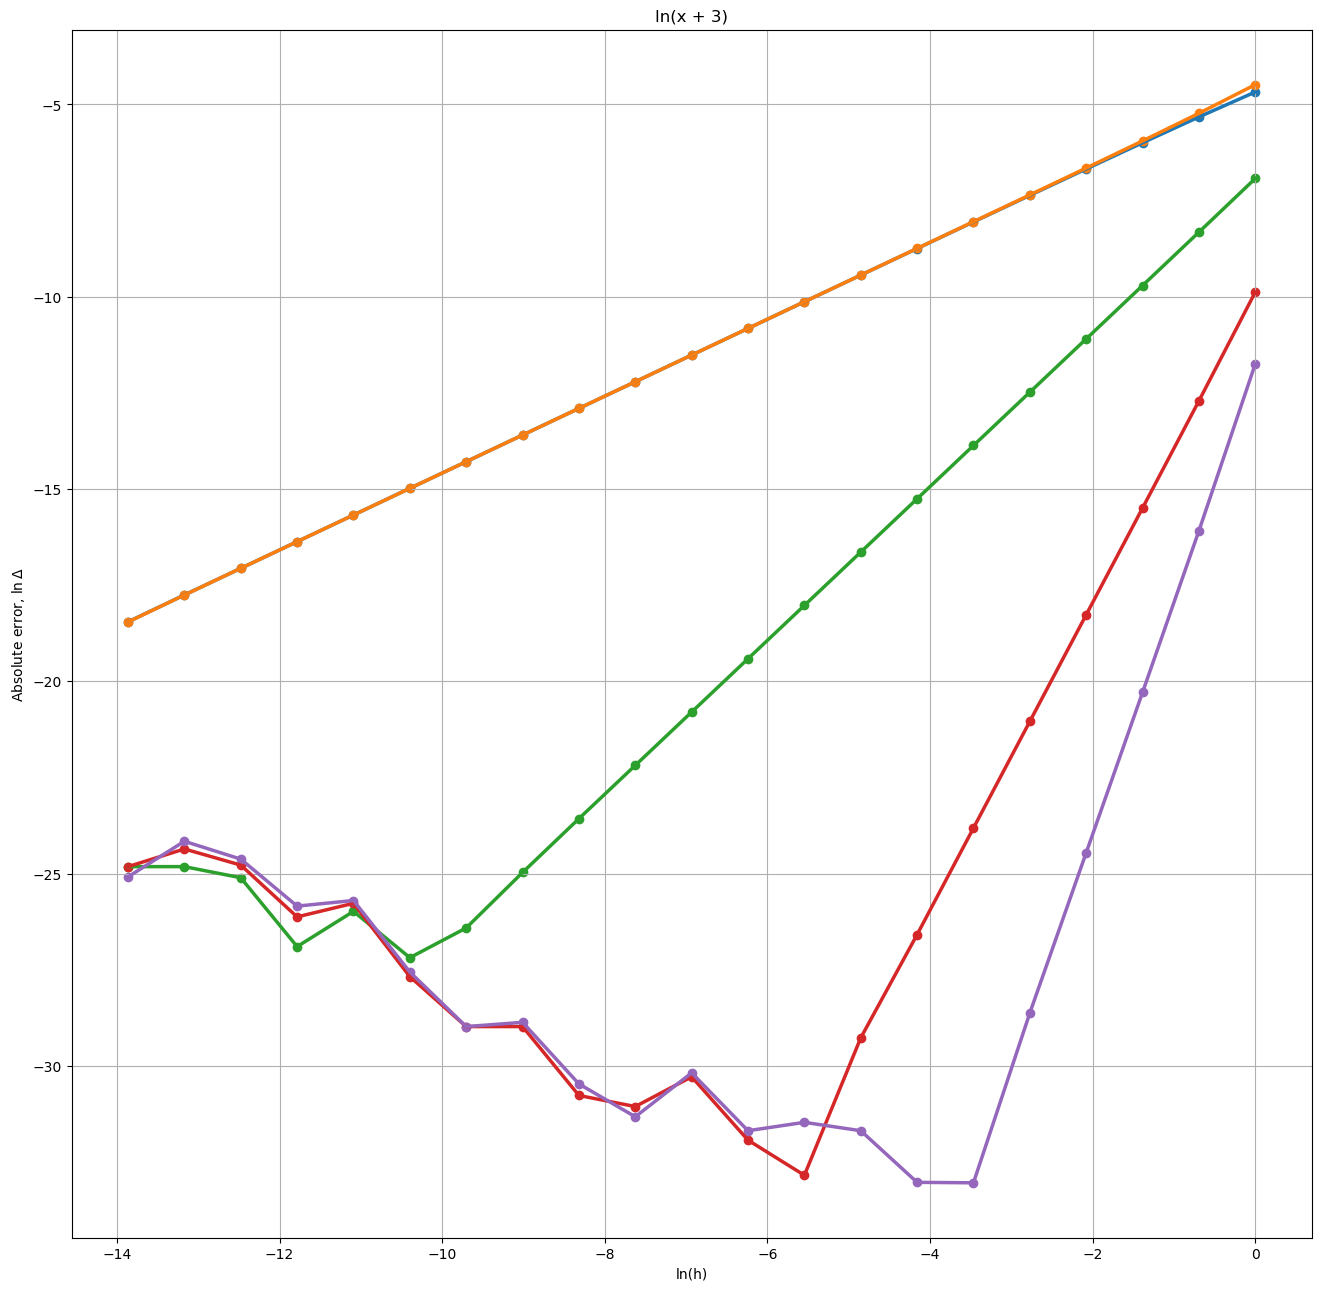

<Figure size 432x288 with 0 Axes>

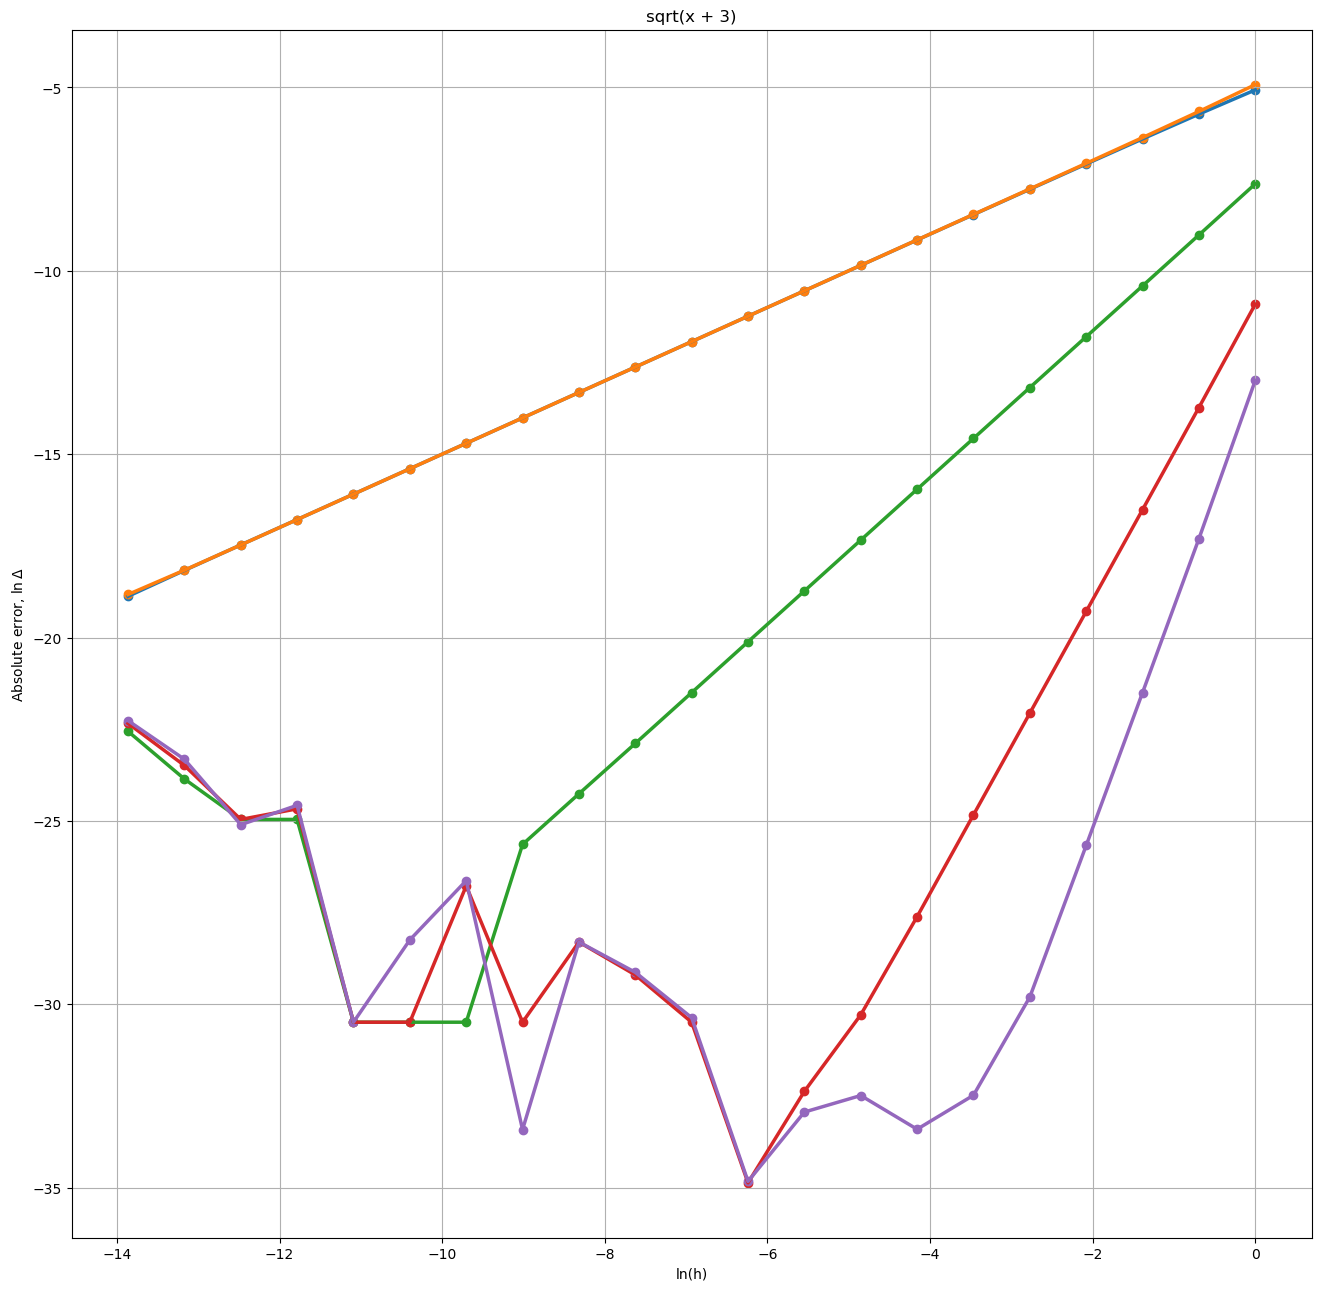

In [42]:
for i in range(5):
  plt.figure()
  fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

  ax1.set_title(func_names[i])
  ax1.set_ylabel("Absolute error, $\ln \Delta$")
  ax1.set_xlabel("ln(h)")

  for j in range(5):
      ax1.scatter(np.log(h), np.log(diff[i][j]))
      ax1.plot(np.log(h), np.log(diff[i][j]), linewidth='2.5')
  
  plt.grid()
  plt.savefig(f"./pictures/.png", dpi=100)
  plt.show()